# Assignment 11
Analyzing Air Quality Index (AQI) Trends in a City

In [1]:
! pip install pandas numpy matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("aqi-data.csv", encoding='latin1')

# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Drop rows with NaT values in the 'date' column
data.dropna(subset=['date'], inplace=True)

# Set 'date' as the index (only do this once)
data.set_index('date', inplace=True)

# Verify the index is now a DatetimeIndex
print(data.index)

# Optional: Display the first few rows of the DataFrame to check
print(data.head())


DatetimeIndex(['1990-02-01', '1990-02-01', '1990-02-01', '1990-03-01',
               '1990-03-01', '1990-03-01', '1990-04-01', '1990-04-01',
               '1990-04-01', '1990-05-01',
               ...
               '2005-11-03', '2005-03-14', '2005-03-16', '2005-03-18',
               '2005-03-21', '2005-03-23', '2005-03-25', '2005-03-28',
               '2005-03-30', '2005-03-30'],
              dtype='datetime64[ns]', name='date', length=49005, freq=None)
            stn_code       sampling_date           state   location agency  \
date                                                                         
1990-02-01     150.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
1990-02-01     151.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
1990-02-01     152.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
1990-03-01     150.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   
1990-03-01     151.0     March - M031990  Andhra Pradesh  Hyderaba

In [3]:
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5
date,,,,,,,,,,,,
1990-02-01,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN
1990-02-01,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN
1990-02-01,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN
1990-03-01,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN
1990-03-01,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN


In [4]:
data.isnull().sum()

stn_code                       15764
sampling_date                      0
state                              0
location                           0
agency                         16355
type                             994
so2                             1313
no2                              858
rspm                            2696
spm                            28659
location_monitoring_station     2537
pm2_5                          49005
dtype: int64

In [5]:
# Drop specified columns
data.drop(columns=["pm2_5", "agency", "stn_code", "rspm", "spm"], inplace=True)


In [6]:

# Check for NaN values in the 'pm2_5' column
data.isnull().sum()

sampling_date                     0
state                             0
location                          0
type                            994
so2                            1313
no2                             858
location_monitoring_station    2537
dtype: int64

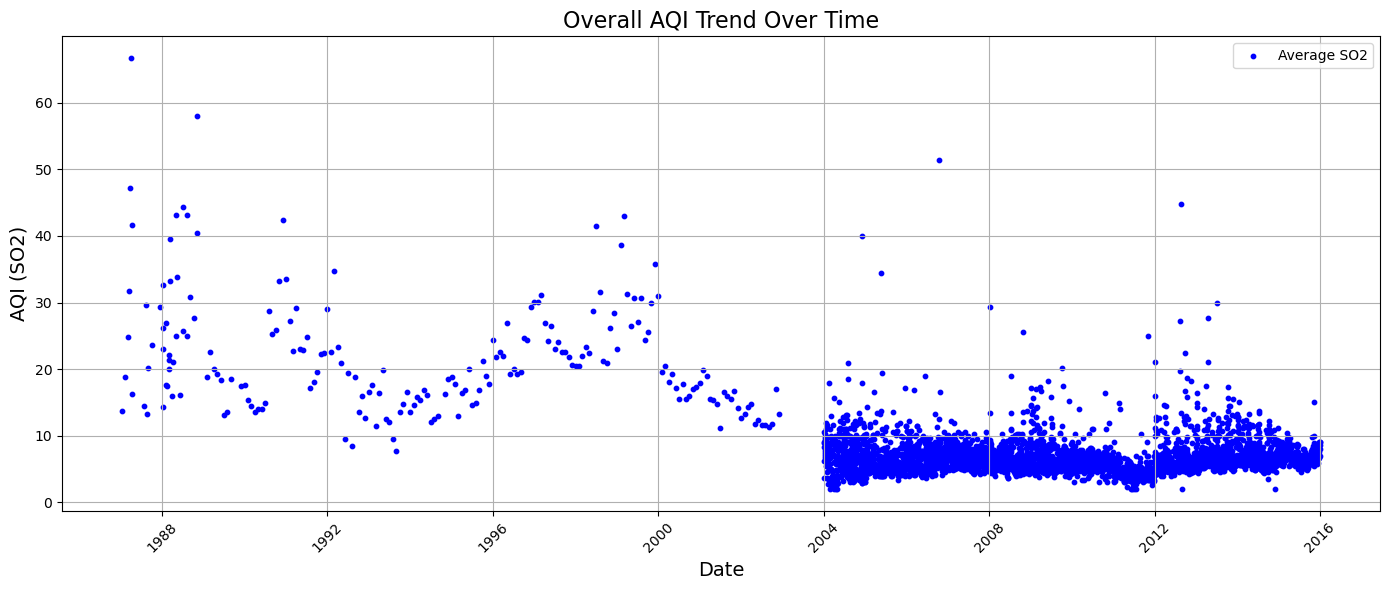

In [8]:
aqi = data.resample('D')['so2'].mean()

# Create a scatter plot
plt.figure(figsize=(14, 6))
plt.scatter(aqi.index, aqi, label='Average SO2', color='blue', s=10)  # s is the size of the points
plt.title('Overall AQI Trend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('AQI (SO2)', fontsize=14)
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

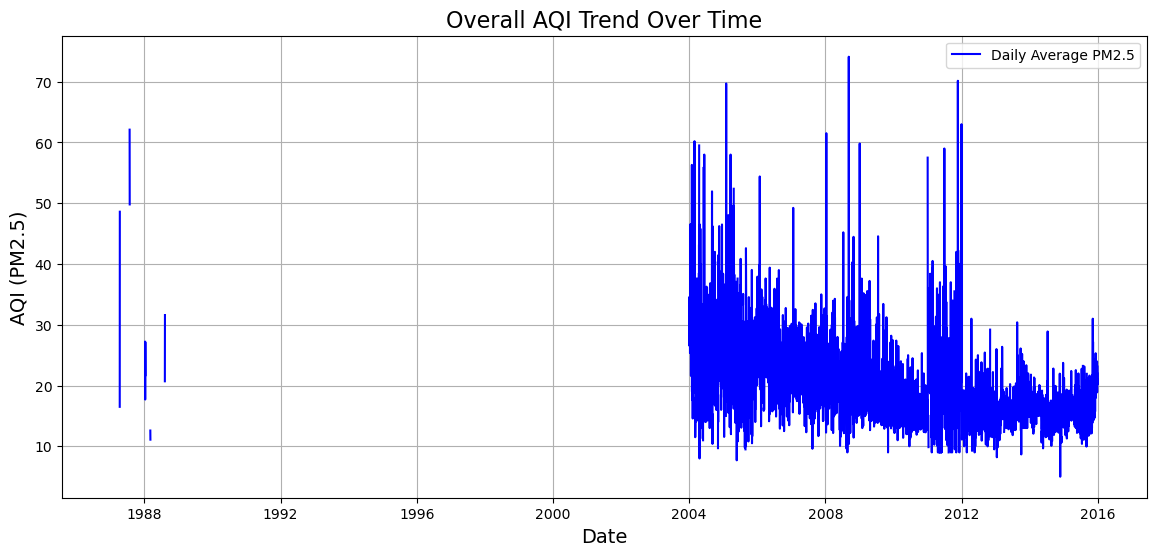

In [9]:
# Calculate daily AQI (assuming pm2_5 is the main AQI indicator)
aqi_daily = data.resample('D')['no2'].mean()

# Create a line plot
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(aqi_daily, label='Daily Average PM2.5', color='blue')
plt.title('Overall AQI Trend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('AQI (PM2.5)', fontsize=14)
plt.legend()
plt.grid()
plt.show()


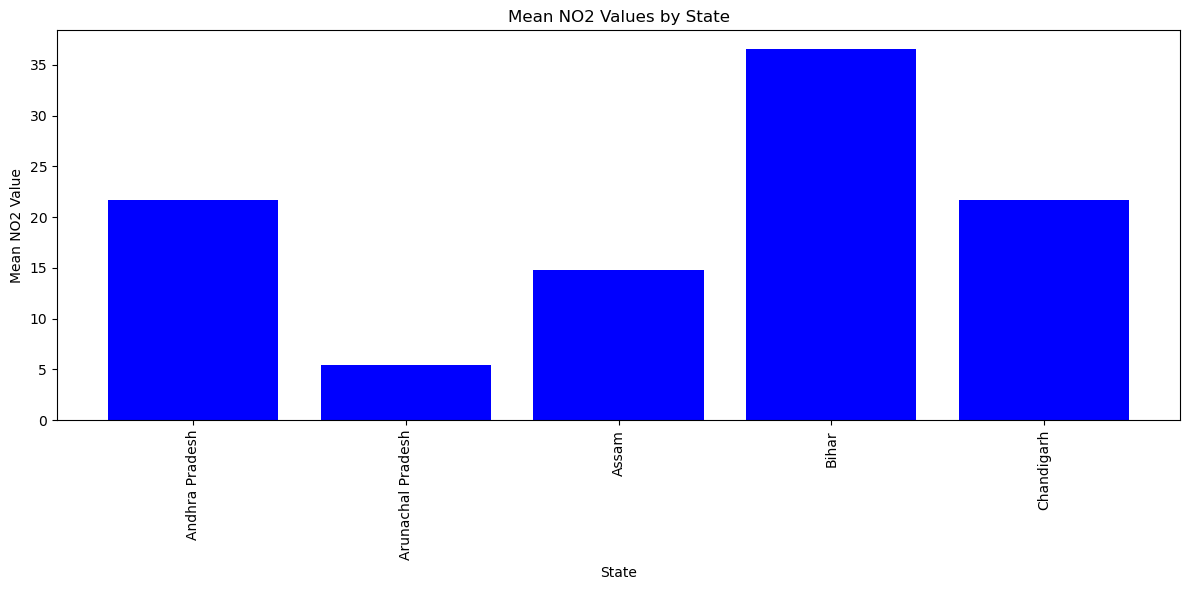

In [10]:
state_means = data.groupby('state')['no2'].mean()

x_axis = state_means.index
y_axis = state_means.values

plt.figure(figsize=(12, 6))
plt.bar(x_axis, y_axis, color='blue')
plt.xlabel('State')
plt.ylabel('Mean NO2 Value')
plt.title('Mean NO2 Values by State')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

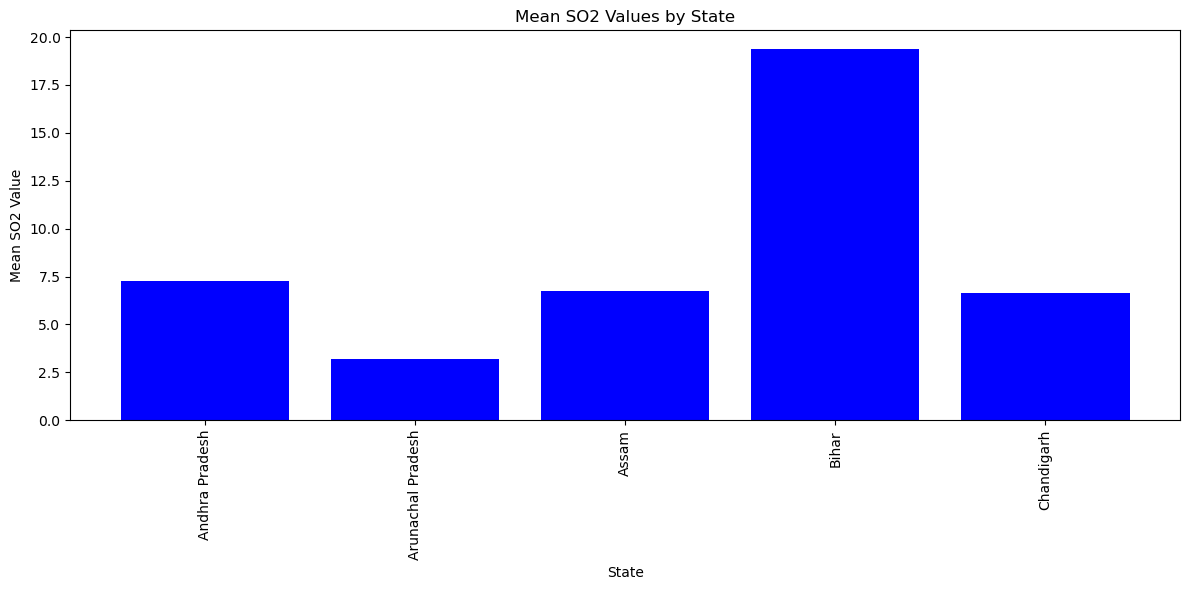

In [11]:
state_means = data.groupby('state')['so2'].mean()

x_axis = state_means.index
y_axis = state_means.values

plt.figure(figsize=(12, 6))
plt.bar(x_axis, y_axis, color='blue')
plt.xlabel('State')
plt.ylabel('Mean SO2 Value')
plt.title('Mean SO2 Values by State')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()